In [0]:
%tensorflow_version 1.x
import sys
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/nn/conv')
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/preprocessing')
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/datasets')
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imagetoarraypreprocessor import ImageToArrayPreprocessor
from aspectawarepreprocessor import AspectAwarePreprocessor
from simplepreprocessor import SimplePreprocessor
from simpledatasetloader import SimpleDatasetLoader
from minivggnet import MiniVGGNet
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
print("[INFO] loading images...")
%cd /content/drive/My\ Drive/Colab_Work
imagePaths = list(paths.list_images('flowers17'))
classNames = [pt.split(os.path.sep)[-2]for pt in imagePaths]
classNames = [str(x) for x in np.unique(classNames)]

[INFO] loading images...
/content/drive/My Drive/Colab_Work


In [0]:
aap = AspectAwarePreprocessor(64, 64)
iap = ImageToArrayPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[aap, iap])
(data, labels) = sdl.load(imagePaths, verbose=100)
data = data.astype("float")/255.0

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25,  random_state=42)

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, 
	    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, 
	    horizontal_flip=True, fill_mode="nearest")

[INFO] processed 100/1360
[INFO] processed 200/1360
[INFO] processed 300/1360
[INFO] processed 400/1360
[INFO] processed 500/1360
[INFO] processed 600/1360
[INFO] processed 700/1360
[INFO] processed 800/1360
[INFO] processed 900/1360
[INFO] processed 1000/1360
[INFO] processed 1100/1360
[INFO] processed 1200/1360
[INFO] processed 1300/1360


In [0]:
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = MiniVGGNet.build(width=64, height=64, depth=3, classes=len(classNames))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
print("[INFO] training network...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=32),
	    validation_data=(testX, testY), steps_per_epoch=len(trainX)//32, epochs=100, verbose=1)

[INFO] training network...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
31/31 [==============================] - 8s 272ms/step - loss: 3.3357 - acc: 0.1529 - val_loss: 2.4399 - val_acc: 0.2853
Epoch 2/100
31/31 [==============================] - 1s 43ms/step - loss: 2.5709 - acc: 0.2863 - val_loss: 2.5267 - val_acc: 0.3353
Epoch 3/100
31/31 [==============================] - 1s 42ms/step - loss: 2.1847 - acc: 0.3780 - val_loss: 1.6168 - val_acc: 0.5206
Epoch 4/100
31/31 [==============================] - 1s 42ms/step - loss: 2.0279 - acc: 0.4179 - val_loss: 1.9463 - val_acc: 0.4471
Epoch 5/100
31/31 [==============================] - 1s 42ms/step - loss: 1.8597 - acc: 0.4446 - val_loss: 1.9577 - val_acc: 0.4382
Epoch 6/100
31/31 [==============================] - 1s 42ms/step - loss: 1.8582 - acc: 0.4578 - val_loss: 1.5839 - val_acc: 0.4941
Epoch 7/100
31/31 [==============================] - 1s 43ms/step - loss: 1.7064 - a

In [0]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=classNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    bluebell       0.83      0.71      0.77        21
   buttercup       0.86      0.60      0.71        20
  colts_foot       0.45      0.75      0.57        20
     cowslip       0.58      0.35      0.44        20
      crocus       0.50      0.93      0.65        15
    daffodil       0.80      0.35      0.48        23
       daisy       1.00      0.78      0.88        27
   dandelion       0.59      0.89      0.71        19
  fritillary       0.47      0.79      0.59        19
        iris       0.78      0.88      0.82        16
 lily_valley       0.79      0.69      0.73        16
       pansy       0.93      0.72      0.81        18
    snowdrop       0.79      0.55      0.65        20
   sunflower       1.00      0.95      0.98        22
   tigerlily       0.90      0.78      0.84        23
       tulip       0.22      0.28      0.24        18
  windflower       0.84      0.70      0.76        2

/content/drive/My Drive/Colab_Work


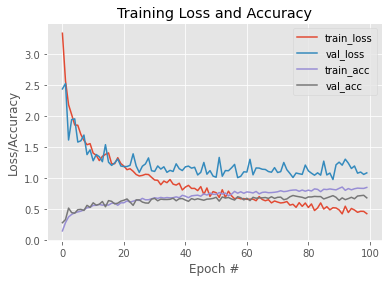

In [8]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
%cd /content/drive/My\ Drive/Colab_Work
plt.savefig('minivggnet_flowers17_augmented_train_test_plot.png')